# Import potrebných knižníc

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import math
import time
from datetime import datetime

# Import datasetu

In [2]:
df = pd.read_csv('country_vaccinations.csv')
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,Zimbabwe,ZWE,2021-04-28,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1388935941...
14990,Zimbabwe,ZWE,2021-04-29,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1388935941...
14991,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1388935941...
14992,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1388935941...


# Odstránenie nepotrebných záznamov

In [3]:
df = df[df.country.str.contains('Slovakia')]
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
12577,Slovakia,SVK,2021-01-04,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12578,Slovakia,SVK,2021-01-05,425.0,425.0,NaN,425.0,425.0,0.01,0.01,NaN,78.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12579,Slovakia,SVK,2021-01-06,6618.0,6618.0,NaN,6193.0,3309.0,0.12,0.12,NaN,606.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12580,Slovakia,SVK,2021-01-07,13661.0,13661.0,NaN,7043.0,4554.0,0.25,0.25,NaN,834.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12581,Slovakia,SVK,2021-01-08,20702.0,20702.0,NaN,7041.0,5176.0,0.38,0.38,NaN,948.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12691,Slovakia,SVK,2021-04-28,1540590.0,1061387.0,479203.0,21520.0,21455.0,28.22,19.44,8.78,3930.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12692,Slovakia,SVK,2021-04-29,1563803.0,1067906.0,495897.0,23213.0,21595.0,28.64,19.56,9.08,3955.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12693,Slovakia,SVK,2021-04-30,1588223.0,1084822.0,503401.0,24420.0,21769.0,29.09,19.87,9.22,3987.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...
12694,Slovakia,SVK,2021-05-01,1608849.0,1101214.0,507635.0,20626.0,21973.0,29.47,20.17,9.30,4025.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...


# Pridanie nového stĺpca

In [4]:
df['month']=20
df.loc[df['date'].str.contains('2021-01'), 'month'] = 'jan'
df.loc[df['date'].str.contains('2021-02'), 'month'] = 'feb'
df.loc[df['date'].str.contains('2021-03'), 'month'] = 'mar'
df.loc[df['date'].str.contains('2021-04'), 'month'] = 'apr'
df.loc[df['date'].str.contains('2021-05'), 'month'] = 'maj'
df

<ipython-input-4-ed0f7ebc12b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=20
C:\Users\lydka\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month
12577,Slovakia,SVK,2021-01-04,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan
12578,Slovakia,SVK,2021-01-05,425.0,425.0,NaN,425.0,425.0,0.01,0.01,NaN,78.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan
12579,Slovakia,SVK,2021-01-06,6618.0,6618.0,NaN,6193.0,3309.0,0.12,0.12,NaN,606.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan
12580,Slovakia,SVK,2021-01-07,13661.0,13661.0,NaN,7043.0,4554.0,0.25,0.25,NaN,834.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan
12581,Slovakia,SVK,2021-01-08,20702.0,20702.0,NaN,7041.0,5176.0,0.38,0.38,NaN,948.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12691,Slovakia,SVK,2021-04-28,1540590.0,1061387.0,479203.0,21520.0,21455.0,28.22,19.44,8.78,3930.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,apr
12692,Slovakia,SVK,2021-04-29,1563803.0,1067906.0,495897.0,23213.0,21595.0,28.64,19.56,9.08,3955.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,apr
12693,Slovakia,SVK,2021-04-30,1588223.0,1084822.0,503401.0,24420.0,21769.0,29.09,19.87,9.22,3987.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,apr
12694,Slovakia,SVK,2021-05-01,1608849.0,1101214.0,507635.0,20626.0,21973.0,29.47,20.17,9.30,4025.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,maj


# Vytvorenie Unixtime

In [5]:
date=df.iloc[:119,[2]].values

In [6]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-6-e8d2d516eb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [7]:
df['unix'] = df['date'].astype(np.int64)
df

<ipython-input-7-1d63d848ba5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unix'] = df['date'].astype(np.int64)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month,unix
12577,Slovakia,SVK,2021-01-04,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan,1609718400000000000
12578,Slovakia,SVK,2021-01-05,425.0,425.0,NaN,425.0,425.0,0.01,0.01,NaN,78.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan,1609804800000000000
12579,Slovakia,SVK,2021-01-06,6618.0,6618.0,NaN,6193.0,3309.0,0.12,0.12,NaN,606.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan,1609891200000000000
12580,Slovakia,SVK,2021-01-07,13661.0,13661.0,NaN,7043.0,4554.0,0.25,0.25,NaN,834.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan,1609977600000000000
12581,Slovakia,SVK,2021-01-08,20702.0,20702.0,NaN,7041.0,5176.0,0.38,0.38,NaN,948.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,jan,1610064000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12691,Slovakia,SVK,2021-04-28,1540590.0,1061387.0,479203.0,21520.0,21455.0,28.22,19.44,8.78,3930.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,apr,1619568000000000000
12692,Slovakia,SVK,2021-04-29,1563803.0,1067906.0,495897.0,23213.0,21595.0,28.64,19.56,9.08,3955.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,apr,1619654400000000000
12693,Slovakia,SVK,2021-04-30,1588223.0,1084822.0,503401.0,24420.0,21769.0,29.09,19.87,9.22,3987.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,apr,1619740800000000000
12694,Slovakia,SVK,2021-05-01,1608849.0,1101214.0,507635.0,20626.0,21973.0,29.47,20.17,9.30,4025.0,Pfizer/BioNTech,Ministry of Health,https://github.com/Institut-Zdravotnych-Analyz...,maj,1619827200000000000


# Prehľad dát

In [8]:
df=df.fillna(0) # Vyplnenie prázdnycch záznamov nulou

In [9]:
print("Počet riadkov: ", df.shape[0])
print("Počet stĺpcov: ", df.shape[1])
print("Názvy stĺpcov: ", df.columns)

Počet riadkov:  119
Počet stĺpcov:  17
Názvy stĺpcov:  Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'month', 'unix'],
      dtype='object')


# Vizualizácia vývoja očkovania v krajine

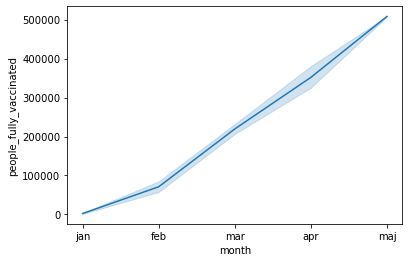

In [10]:
sns.lineplot(x="month", y="people_fully_vaccinated", data=df)
sns.set_context("paper")
plt.show()

# Rozdelenie dát z datasetu na trénovacie a testovacie

In [11]:
x=df.iloc[:119,[3,7]].values #vybratie vstupných dát - načítanie všetkých hodnôt zo 4. a 8. stpĺca datasetu do matice 
y=df.iloc[:119,[5]].values #vybratie výstupných dát - načítanie hodnôt 6. stpĺca datesetu do matice

In [12]:
maticax_trenovacia, maticax_testovacia, maticay_trenovacia, maticay_testovacia = train_test_split(x, y, test_size=0.20)
#vytvorenie premenných 

# Nastavenie a  kompilácia Keras modelu

In [13]:
#input_dim označuje počet vstupných premenných
#počet vrstiev ns je 3, ktoré obsahujú hustotu, počet neurónov či uzlov a aktivačnú funkciou  

#%10%
#keras_model.add(Dense(10,input_dim=3,activation='sigmoid'))
#keras_model.add(Dense(50,activation='relu'))
#keras_model.add(Dense(1,activation='relu'))
#13%
#keras_model.add(Dense(10,input_dim=3,activation='sigmoid'))
#keras_model.add(Dense(50,activation='relu'))
#keras_model.add(Dense(1))
#11%
#keras_model.add(Dense(10,input_dim=3,activation='relu'))
#keras_model.add(Dense(50,activation='relu'))
#keras_model.add(Dense(1,activation='relu'))

keras_model = Sequential()
keras_model.add(Dense(12,input_dim=2,activation='relu'))
keras_model.add(Dense(8,activation='relu'))
keras_model.add(Dense(1,activation='sigmoid'))

In [14]:
#kompilácia modelu
#určenie stratovej váhy, optimizéru a metriky 
#natrénovanie modelu pomocou fit(), epocha označuje počet prechodov po údajoch
#scores označuje presnosť
keras_model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = keras_model.fit(maticax_trenovacia, maticay_trenovacia, validation_data = (maticax_testovacia, maticay_testovacia), epochs = 10, batch_size = 50)
scores=keras_model.evaluate(maticax_trenovacia,maticay_trenovacia)

Epoch 1/10
2/2 [==============================] - 2s 976ms/step - loss: 28902242986.6667 - accuracy: 0.1172 - val_loss: 38698688512.0000 - val_accuracy: 0.1250
Epoch 2/10
2/2 [==============================] - 0s 40ms/step - loss: 27278943573.3333 - accuracy: 0.0902 - val_loss: 36948103168.0000 - val_accuracy: 0.1250
Epoch 3/10
2/2 [==============================] - 0s 34ms/step - loss: 24115347456.0000 - accuracy: 0.1168 - val_loss: 35218096128.0000 - val_accuracy: 0.1250
Epoch 4/10
2/2 [==============================] - 0s 36ms/step - loss: 23396009984.0000 - accuracy: 0.0968 - val_loss: 33496432640.0000 - val_accuracy: 0.1250
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: 23012485802.6667 - accuracy: 0.1102 - val_loss: 31783221248.0000 - val_accuracy: 0.1250
Epoch 6/10
2/2 [==============================] - 0s 34ms/step - loss: 22274508117.3333 - accuracy: 0.1035 - val_loss: 30083104768.0000 - val_accuracy: 0.1250
Epoch 7/10
2/2 [=============================

In [15]:
print((scores[1]*100)) #presnosť

9.473684430122375


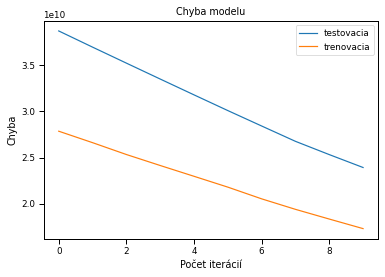

In [16]:
#graf chyby modelu
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('Počet iterácií') #number of epochs(počet prejdení po datasete)
plt.legend(['testovacia', 'trenovacia'])
plt.show()

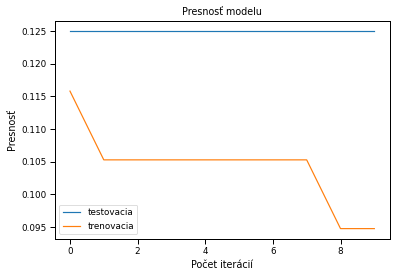

In [17]:
#graf presnosti modelu
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Presnosť modelu')
plt.ylabel('Presnosť')
plt.xlabel('Počet iterácií') #number of epochs(počet prejdení po datasete)
plt.legend(['testovacia', 'trenovacia'])
plt.show()

In [18]:
# trieda predikcia 
predictions = keras_model.predict_classes(x)
# vypísaných prvých 5 predikcií
for i in range(5):
    print('%s => %d (expected %d)' % (x[i].tolist(), predictions[i], y[i]))

[0.0, 0.0] => 1 (expected 0)
[425.0, 425.0] => 1 (expected 0)
[6618.0, 3309.0] => 0 (expected 0)
[13661.0, 4554.0] => 0 (expected 0)
[20702.0, 5176.0] => 0 (expected 0)


C:\Users\lydka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
